In [1]:
import star_functions as nana
import pandas as pd
import glob
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii
import numpy as np
from astropy import units as u
import matplotlib.ticker as ticker
import importlib
import os
importlib.reload(nana)
%reload_ext autoreload
%autoreload 2
from datetime import datetime

/Users/nana/venv/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


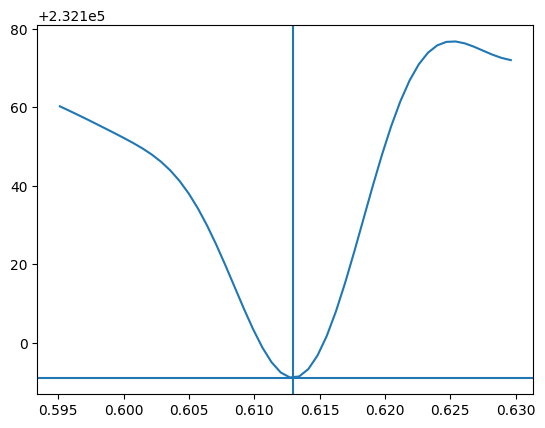

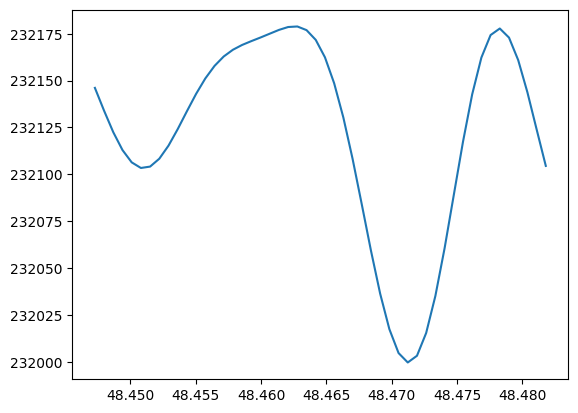

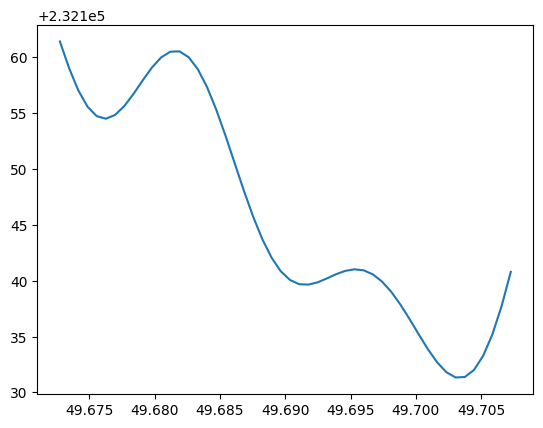

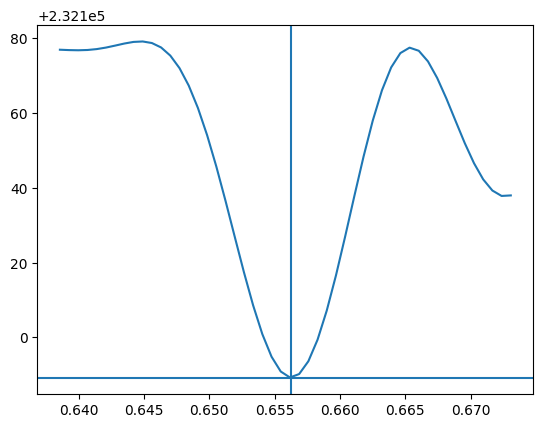

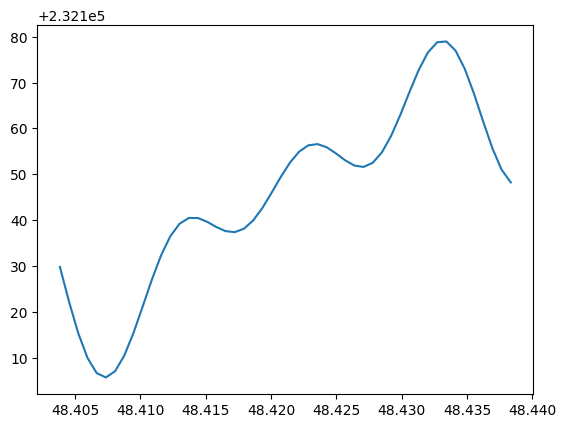

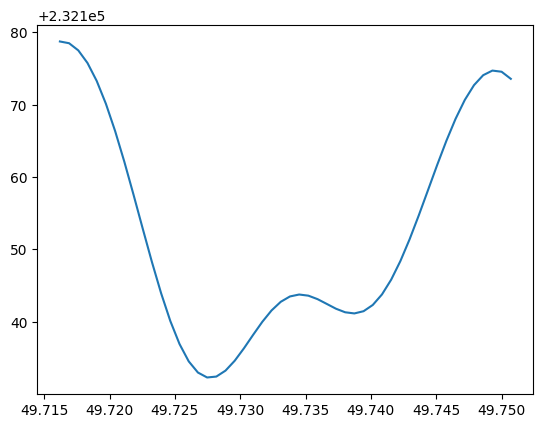

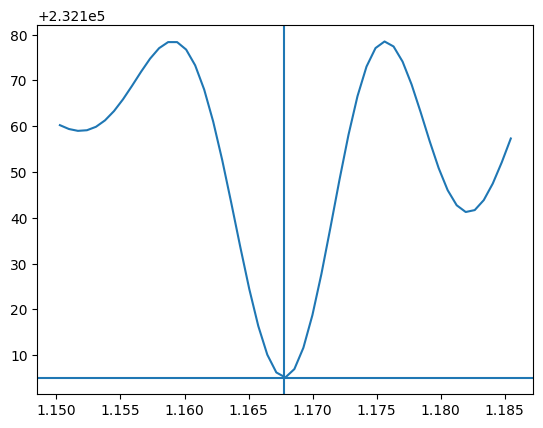

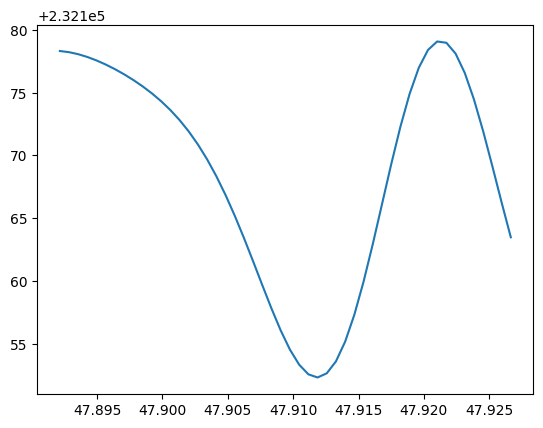

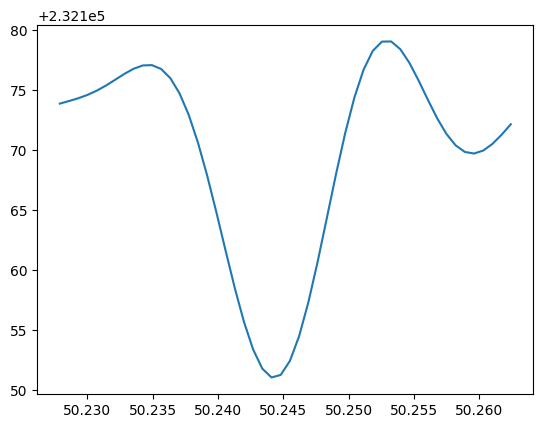

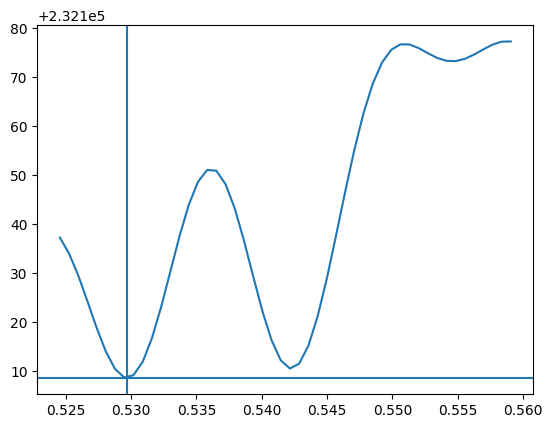

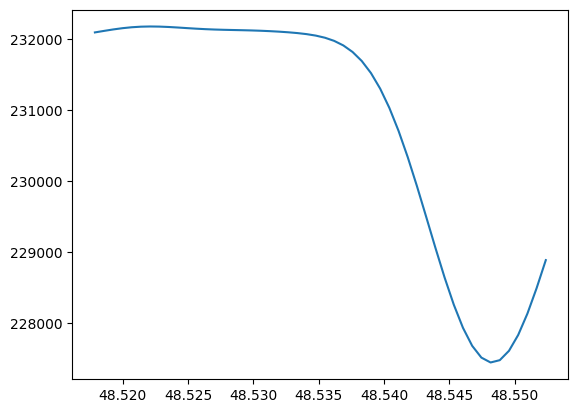

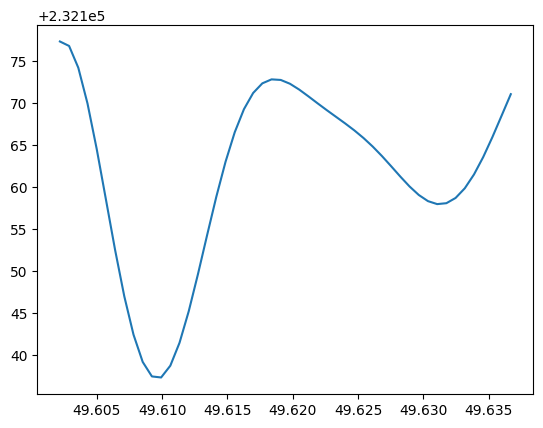

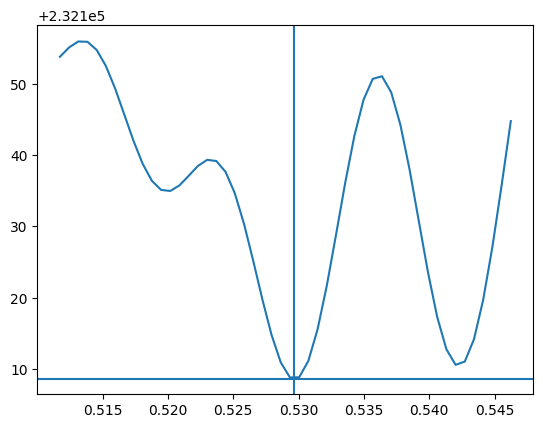

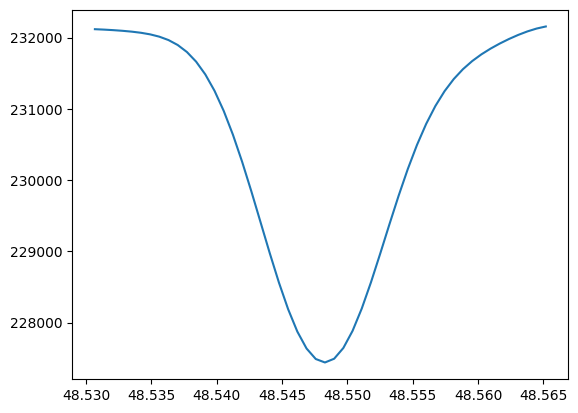

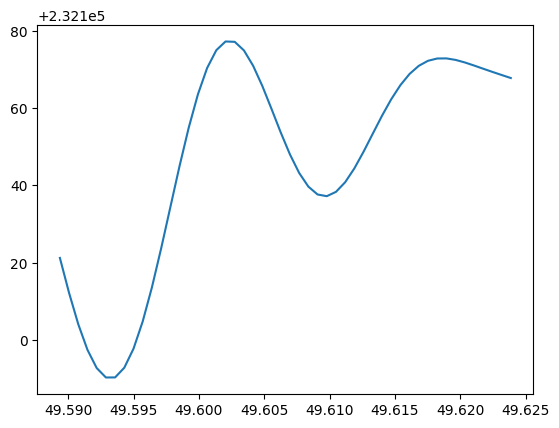

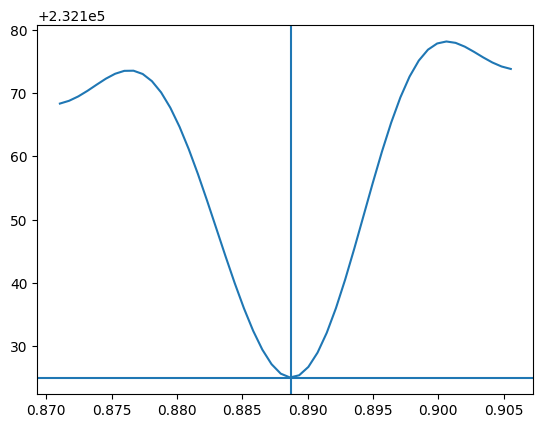

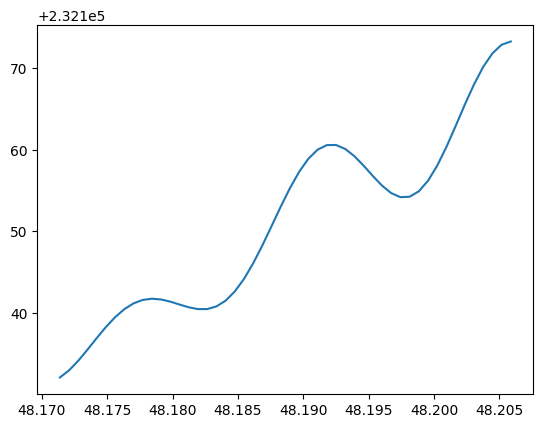

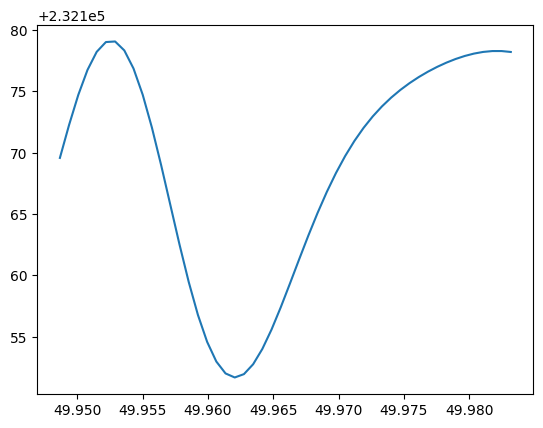

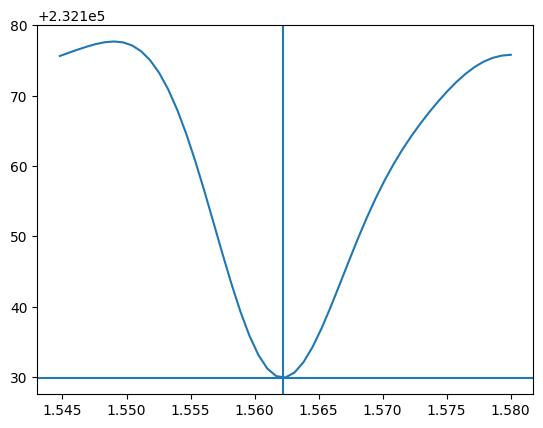

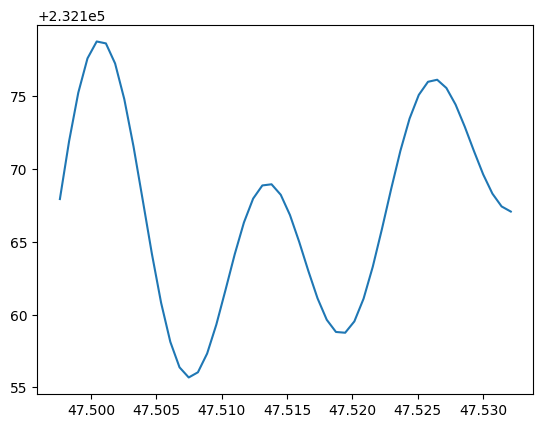

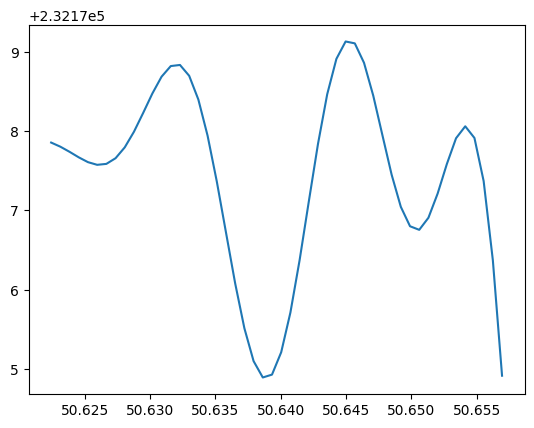

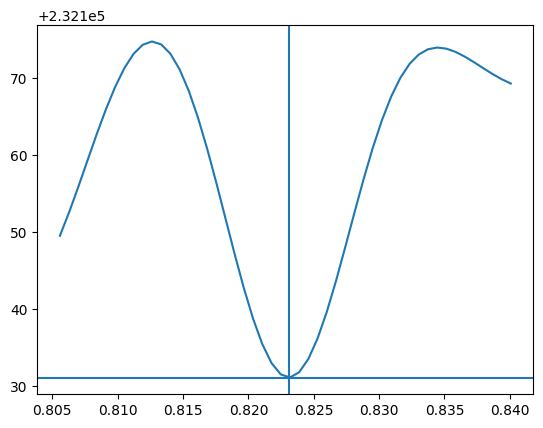

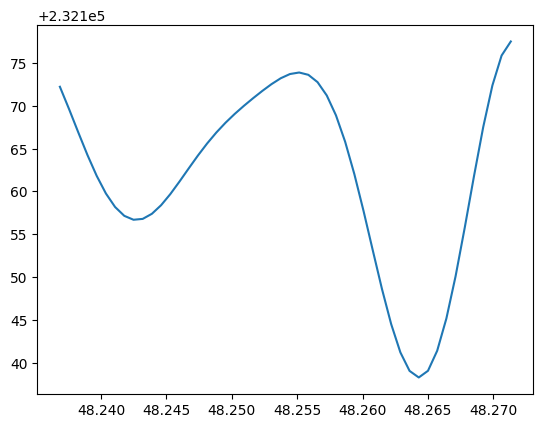

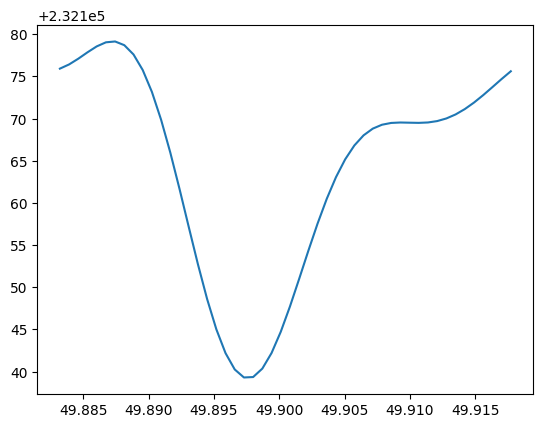

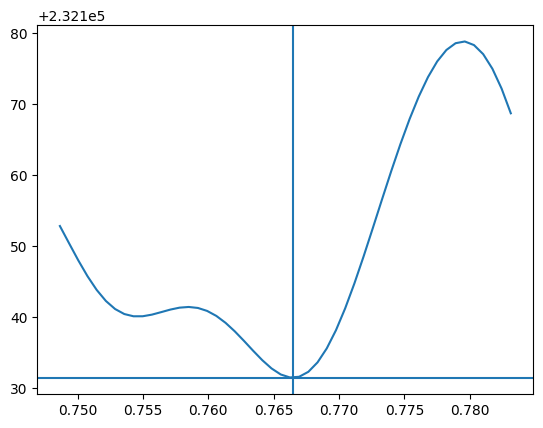

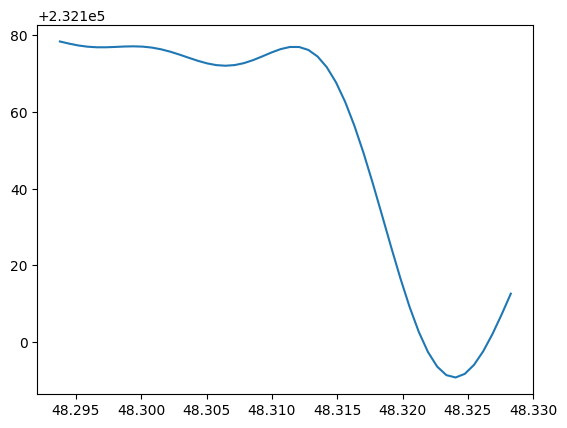

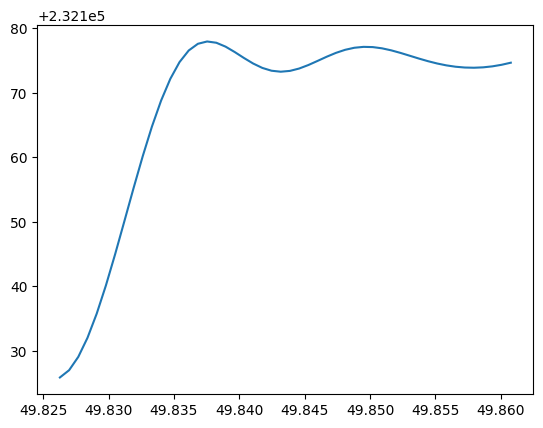

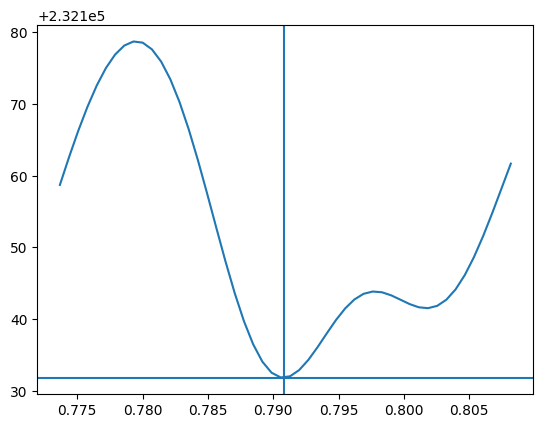

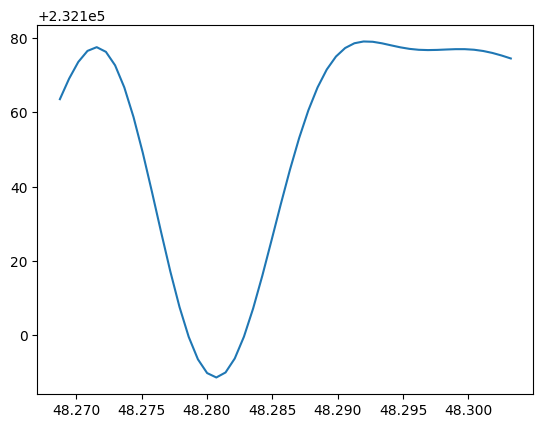

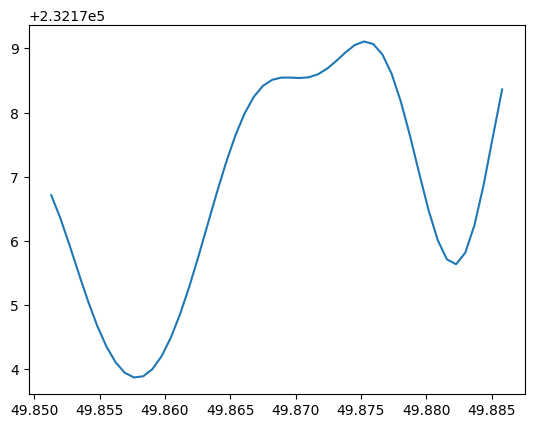

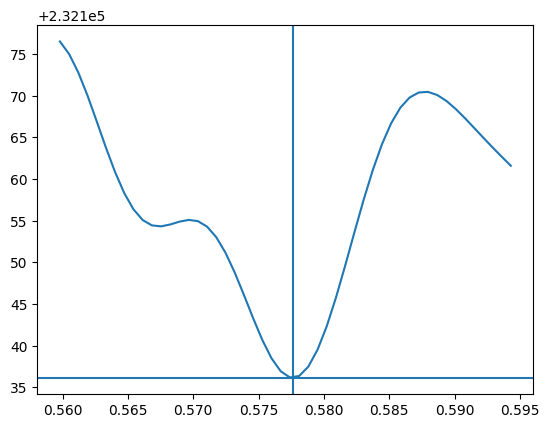

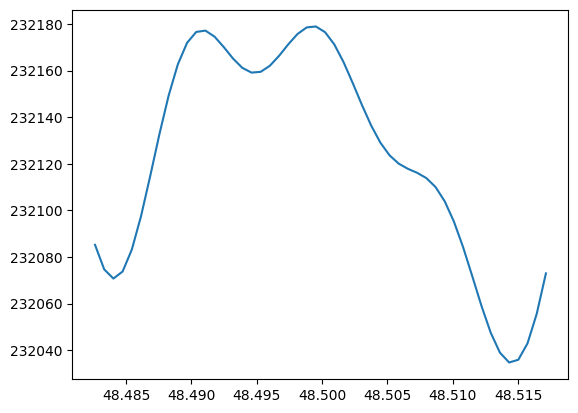

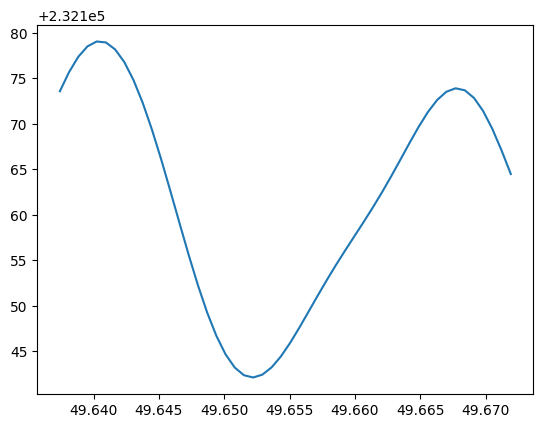

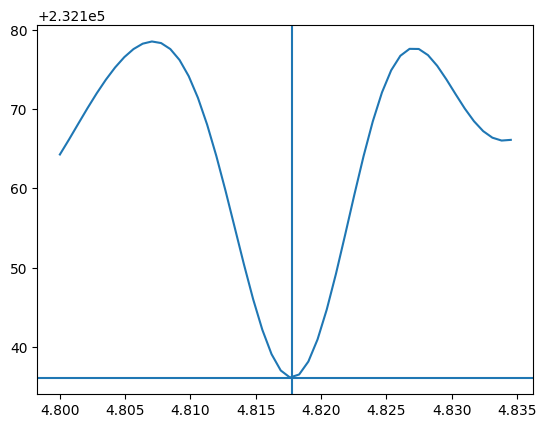

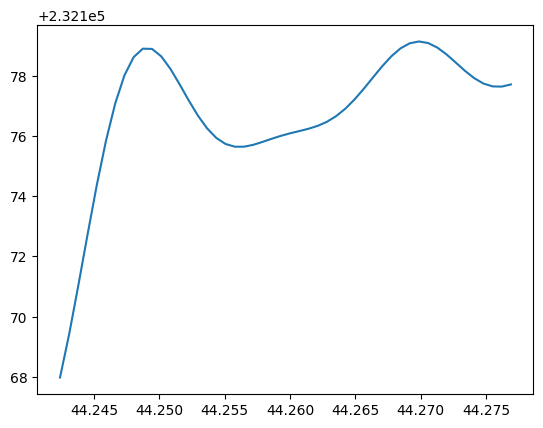

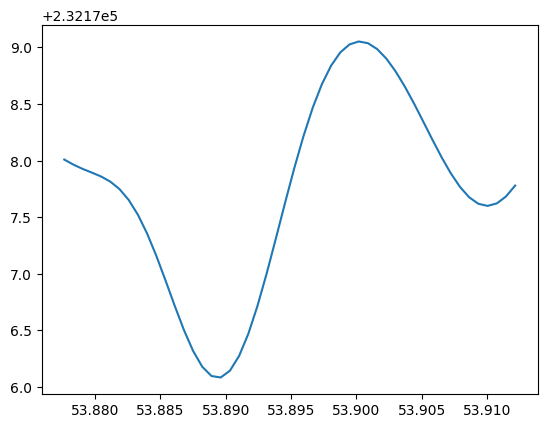

regions:['B' 'A' 'A' 'B' 'B' 'A' 'A' 'A' 'B' 'B' 'B' 'A'] final freqs:[np.float64(48.471289220356454) np.float64(0.6562701384013533)
 np.float64(1.1677860185882112) np.float64(48.54827353702732)
 np.float64(48.54827414814468) np.float64(0.888745418805805)
 np.float64(1.5621985904121525) np.float64(0.8230913523200911)
 np.float64(48.32398275274463) np.float64(48.280691897805106)
 np.float64(48.51451584222806) np.float64(4.817759047427796)]


In [17]:
#ANOTHER POSTER CHILD KIC 7767699

lc, delta_f, sampling_time, exptime776= nana.star('KIC8264159')
# print("delta_f:", delta_f)
# print("sampling_time:", sampling_time)
#if lc is None:
    #return 
f_max = (3 / (2*sampling_time))
f_min = 0.5
df = delta_f/3

t_fit776, flux_fit776, weight_fit776 = nana.mask_vals(lc)
freq_full, power_full = nana.pg_full(f_min, f_max, df, lc)
freq_mini, power_mini = nana.pg_mini(f_min, f_max, df, lc )

# plt.plot(freq_mini, power_mini, 'k.')
# plt.show()
# plt.plot(freq_full, power_full, 'k.')
# plt.show()

indices = nana.get_filtered_peaks(12, freq_mini, power_mini)


refined_freq, refined_power, second_derivatives = nana.refine_peaks(freq_mini, power_mini, indices)
# plt.plot(freq_mini, power_mini, 'k.')
# plt.scatter(freq_mini[indices], refined_power, color = 'red', marker = 'o')
# plt.show()

fc = nana.folding_freq(delta_f, freq_full, power_full, sampling_time, False)
regions, final_freqs776, chi2s = nana.region_and_freq(indices, fc, df, freq_mini, power_mini, t_fit776, flux_fit776, weight_fit776, exptime776)
print(f"regions:{regions}", f"final freqs:{final_freqs776}")

# plt.plot(freq_full, power_full, 'k-')
# plt.scatter(final_freqs776, refined_power, color = 'red', marker = 'o')
# plt.show()

# plt.plot(freq_mini, power_mini, 'g-')
# plt.show()

a_early, a_late, b_early, b_late = nana.check_coherence(t_fit776, flux_fit776, weight_fit776, final_freqs776, exptime776)
rate_of_phase776, rate_of_amp776 = nana.change_in_phase_and_amp(a_early, a_late, b_early, b_late, t_fit776)
delta_chi2s = nana.null_chi_squared(flux_fit776, weight_fit776) - chi2s
sharpnesses = nana.sharpness(second_derivatives, refined_power)

In [10]:
print("indices:", indices, "fc:", fc, "df:", df)

indices: [  32   44  190   12    8  110  302   92   76   83   22 1226] fc: 49.077627912698794 df: 0.003520904630029551


In [9]:
nana.star_search(8264159)

star_search() indices: [  32   44  190   12    8  110  302   92   76   83   22 1226   49  131
   72   86   61  194 2722 1102 3657  229  149  268] fc: 49.077627912698794 df; 0.003520904630029551


ValueError: find_min_and_refine(): no local minima found